#**TECHNOHACKS EDUTECH INTERNSHIP**

**About TECHNOHACKS**

**They provide top-notch IT training and
cutting-edge products to help businesses
and individuals stay ahead in the everevolving tech landscape. Our team of experts is dedicated to helping you
achieve your goals and reach your full
potential.**

**You can follow them on linkedIn**: https://www.linkedin.com/company/technohacks-edutech/

#**Task 1 : Perform Data Cleaning**

**Data Cleaning on Titanic Dataset**

**data set link**: https://www.kaggle.com/c/titanic/data

**Variable Description**

1. PassengerId: unique id number to each passenger

2. Survived: passenger survive(1) or died(0)

3. Pclass: passenger class
4. Name: name
6. Sex: gender of passenger
7. Age: age of passenger
8. SibSp: number of siblings/spouses
9. Parch: number of parents/children
10. Ticket: ticket number
11. Fare: amount of money spent on ticket
12. Cabin: cabin category
13. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [ ]:
print(f"shape of train_df:{train_df.shape} and shape of test_df:{test_df.shape}")

shape of train_df:(891, 12) and shape of test_df:(418, 11)


#combining train and test df and making a single dataset

In [ ]:
df =train_df.append(test_df, ignore_index=True)

In [ ]:
df.shape

(1309, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#checking the duplicates
df.duplicated().sum()

0

#checking the information of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


**checking missing values**

In [ ]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

**colclusion**

we can see that survived columns have 31% missing values

age has 20 %missing values..we will fill the values after finding the distribution of the features

Fare and Embarked columns also have some missing values but can be filled with mean and mode.

we can see that Cabin have 77% missing values.we will drop this columns  

In [ ]:
#removing cabin columns
df.drop(columns="Cabin",inplace=True)

**lets see the summary discription of the dataset**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


**conculsions**

In fare columns we can see that 75% of data contains less than 31 but the maximum values is 512.we found the outliers

**distribution of the numerical columns**

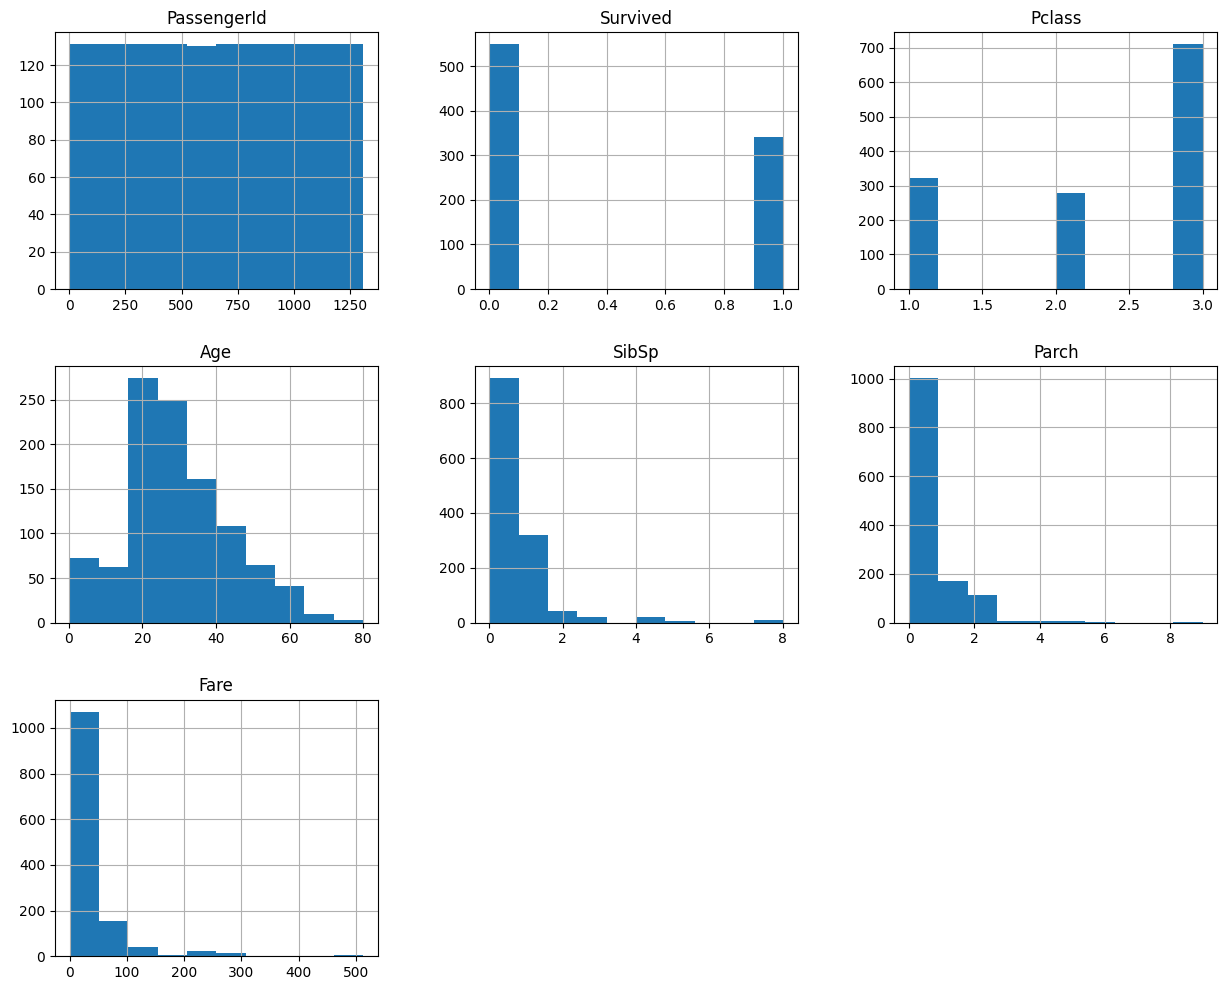

In [ ]:
df.hist(figsize=(15,12))
plt.show()

**conclusion:**

Most of the columns follow right skeweness

#Outliers

**Removing outliers of Fare Columns using IQR method**

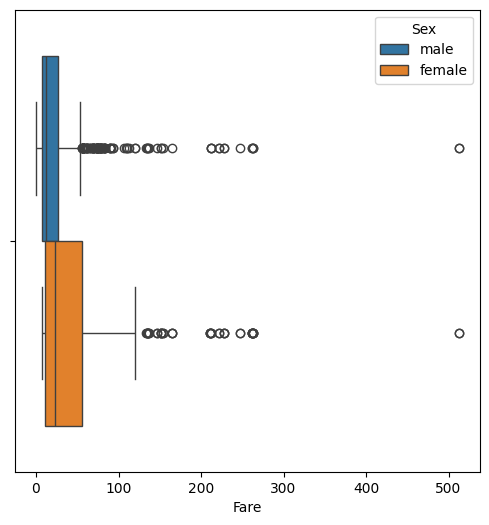

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x=df["Fare"],hue="Sex")
plt.show()

In [ ]:
# Calculate the IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower bound:",lower_bound)
print("upper bound:",upper_bound)

lower bound: -27.172999999999995
upper bound: 66.34379999999999


In [ ]:
 #outliers removal and storing them in new df
 new_df=df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

In [ ]:
new_df["Fare"].describe().T

count    1137.000000
mean       17.962074
std        13.829925
min         0.000000
25%         7.879200
50%        13.000000
75%        26.000000
max        65.000000
Name: Fare, dtype: float64

**Fare Outliers has been removed**

**Filling missing values**

In [ ]:
new_df.isnull().sum()

PassengerId      0
Survived       362
Pclass           0
Name             0
Sex              0
Age            245
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

<Axes: >

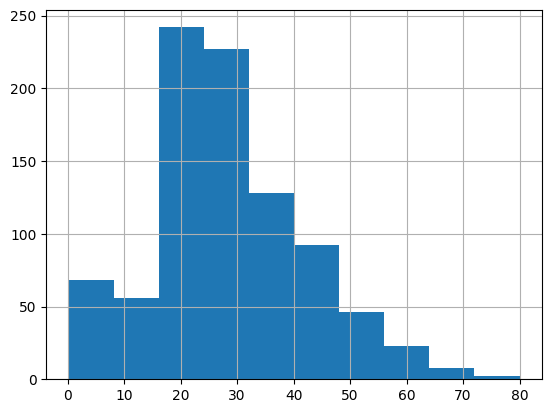

In [ ]:
new_df["Age"].hist()

age follows kind of normal distribution

In [ ]:
new_df["Age"].describe().T

count    892.000000
mean      28.704316
std       13.886884
min        0.170000
25%       20.000000
50%       27.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#filling Age columns with mean or median
new_df["Age"].fillna(new_df["Age"].mean(),inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

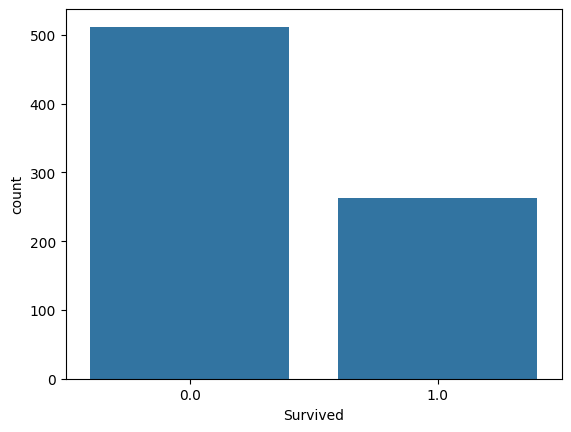

In [ ]:
sns.countplot(data=new_df,x="Survived")

filling Survived Columns with mode

In [ ]:
new_df["Survived"].fillna(new_df["Survived"].mode()[0],inplace=True)

In [ ]:
new_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**save a cleaned data**

In [ ]:
new_df.to_csv("cleaned_titanic.csv",index=False)

#**TASK 2 : Calculate summary statistics of Titanic DataSet**

**why summmary statistics important for data analytics?**

**Summary statistics are essential for understanding data. it provide key insights into its characteristics which  include measures like mean, median, and mode. Summary statistics help identify outliers and  guide for data cleaning and preprocessing.**

In [ ]:
df = pd.read_csv("/content/cleaned_titanic.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
2,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
3,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
4,6,0.0,3,"Moran, Mr. James",male,28.704316,0,0,330877,8.4583,Q


In [ ]:
#summary statistics
df.describe(percentiles=[0.25, 0.75]).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1137.0,653.149516,377.983079,1.00,329.0000,654.000000,979.0,1309.0
Survived,1137.0,0.231310,0.421856,0.00,0.0000,0.000000,0.0,1.0
Pclass,1137.0,2.463500,0.740393,1.00,2.0000,3.000000,3.0,3.0
Age,1137.0,28.704316,12.298566,0.17,22.0000,28.704316,33.0,80.0
SibSp,1137.0,0.418646,0.852051,0.00,0.0000,0.000000,1.0,5.0
Parch,1137.0,0.328936,0.770825,0.00,0.0000,0.000000,0.0,6.0
Fare,1137.0,17.962074,13.829925,0.00,7.8792,13.000000,26.0,65.0


In [ ]:
# Count of unique values
print("unique values in columns:\n",df.nunique())

unique values in columns:
 PassengerId    1137
Survived          2
Pclass            3
Name           1135
Sex               2
Age              96
SibSp             6
Parch             7
Ticket          876
Fare            233
Embarked          3
dtype: int64


In [ ]:
#mean values of all the numerical features
mean_values=df.mean()
print("mean of all numerical featues:\n",mean_values)

mean of all numerical featues:
 PassengerId    653.149516
Survived         0.231310
Pclass           2.463500
Age             28.704316
SibSp            0.418646
Parch            0.328936
Fare            17.962074
dtype: float64


In [ ]:
#median values of all the numerical features
median_values=df.mean()
print("median of all numerical featues:\n",median_values)

median of all numerical featues:
 PassengerId    653.149516
Survived         0.231310
Pclass           2.463500
Age             28.704316
SibSp            0.418646
Parch            0.328936
Fare            17.962074
dtype: float64


In [ ]:
#mode
mode_values = df.mode().iloc[0]
print("mode values:",mode_values)

mode values: PassengerId                       1
Survived                        0.0
Pclass                          3.0
Name           Connolly, Miss. Kate
Sex                            male
Age                       28.704316
SibSp                           0.0
Parch                           0.0
Ticket                         1601
Fare                           8.05
Embarked                          S
Name: 0, dtype: object


In [ ]:
#standard deviation
std_values = df.std()
print("standard deviation values:",std_values)

standard deviation values: PassengerId    377.983079
Survived         0.421856
Pclass           0.740393
Age             12.298566
SibSp            0.852051
Parch            0.770825
Fare            13.829925
dtype: float64


In [ ]:
#min
print("min values of all the numerical features:\n",df.min(numeric_only=True))

min values of all the numerical features:
 PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.17
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64


In [ ]:
#max
print("max values of all the features:\n",df.max(numeric_only=True))

max values of all the features:
 PassengerId    1309.0
Survived          1.0
Pclass            3.0
Age              80.0
SibSp             5.0
Parch             6.0
Fare             65.0
dtype: float64


#**Task 3 : Visualization using Histogram**

**Create a histogram or bar chart to visualize
the distribution of data in a dataset**


**why visualzation is important in data analysis?**

**Visualization is important for Exploring Data,Communicating Insight,Identifying Patterns**

**Importing iris dataset**

In [ ]:
iris = pd.read_csv("/content/Iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**checking for missing values**

In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Histogram**

1. **What is the distribution of sepal length(CM) for each species?**

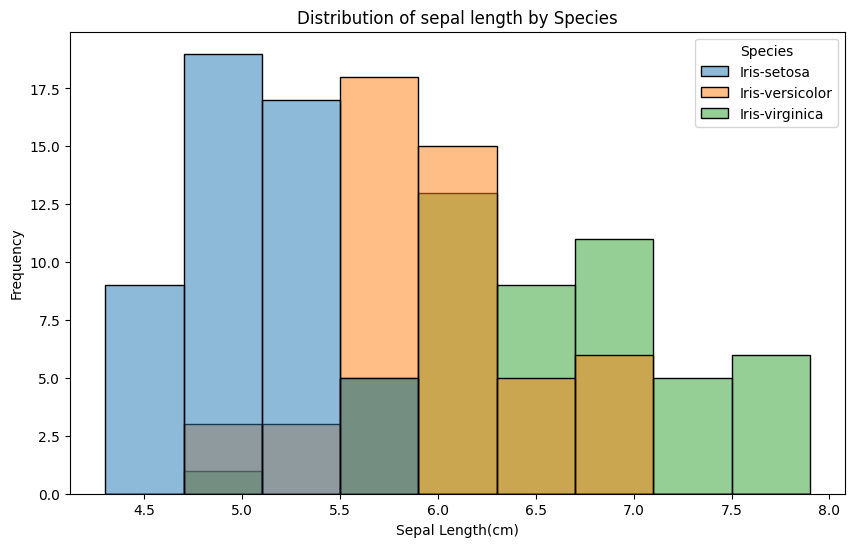

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=iris,x="SepalLengthCm",hue="Species")
plt.title("Distribution of sepal length by Species")
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Frequency')
plt.show()

**Scatter plot**

2. **What is the relationship between sepal length and sepal width for each species?**

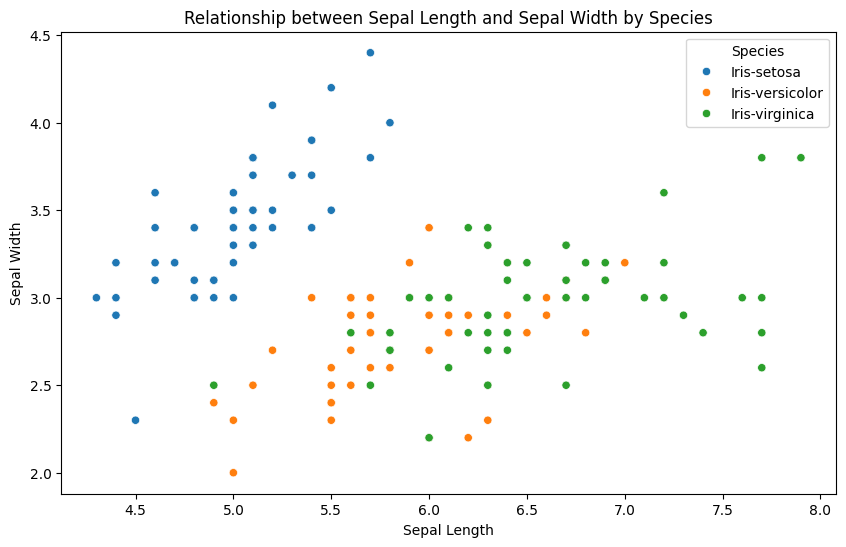

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title('Relationship between Sepal Length and Sepal Width by Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

**barchart**

**3. what is the total count of all the Species**

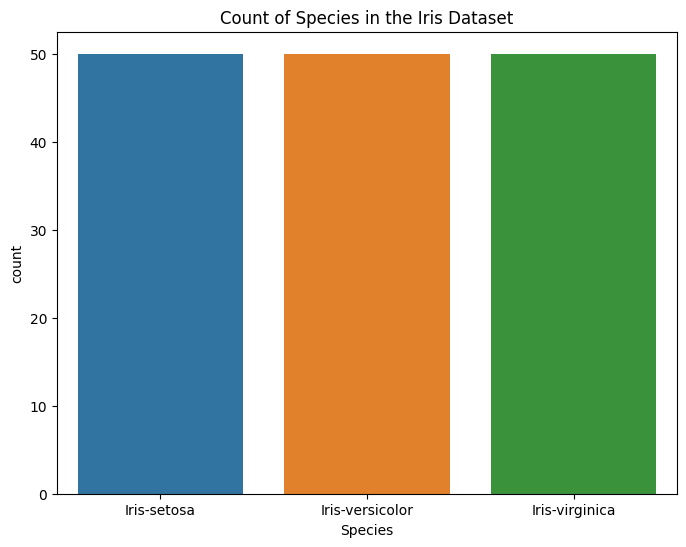

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=iris, x='Species',hue="Species")
plt.title('Count of Species in the Iris Dataset')
plt.xlabel('Species')
plt.show()

**Piechart**

**4. what is the Distribution of species in the dataset**

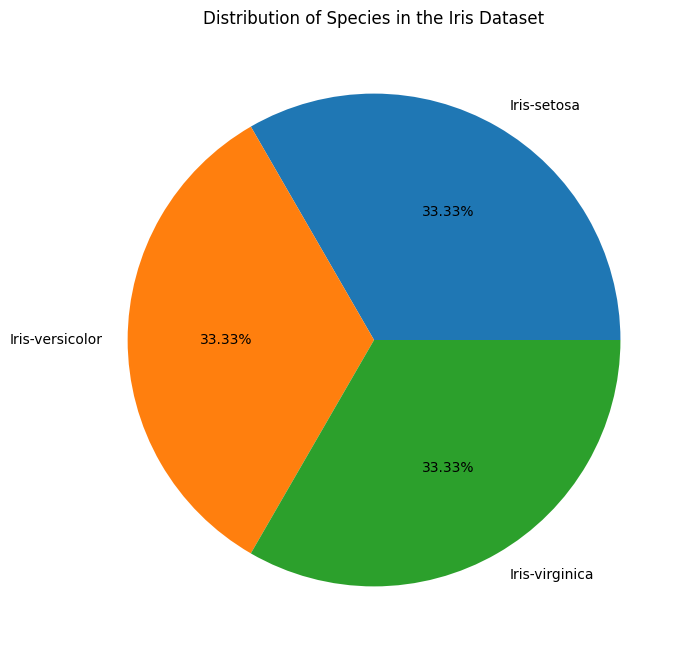

In [ ]:
species_counts = iris["Species"].value_counts()
plt.figure(figsize=(10,8))
plt.pie(species_counts,labels=species_counts.index,autopct="%1.2f%%")
plt.title('Distribution of Species in the Iris Dataset')
plt.show()

**Heatmap**

**5. what is the corelation between each features in Iris dataset**


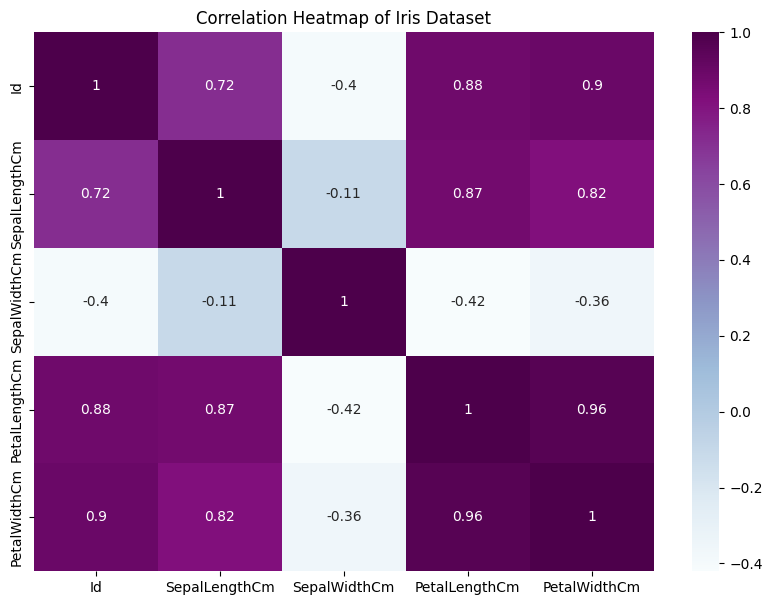

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(iris.corr(),annot=True,cmap='BuPu')
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()